In [ ]:
"""
Purpose: To take in a whole neuron that could have any number of somas
and then to split it into multiple neuron objects

Pseudocode: 
1) Get all of the split suggestions
2) Split all of the limbs that need splitting
3) Once have split the limbs, split the neuron object into mutliple objects


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [32]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

import system_utils as su

In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-03 23:20:55,375 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-03 23:20:55,615 - settings - Setting enable_python_native_blobs to True


# Picking the Neuron

In [17]:
minnie.Decomposition() & "n_error_limbs>2"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135081644023,0,0.25,=BLOB=,853714,1717788,3,2,2,2,12,274,133,9151050.956985964,3241470.4075203836,19951.921,149.01,148.057,441.244,416.737,3461,0.0003782079256544685,12.63138686131387,6071207.457,136,0.0005700678200362805,25.449,249095068700.38538,44005779.70668538,27220.37827908988,41028.917305927826,1831581387.5028336,3155.4383
864691135758516046,0,0.25,=BLOB=,1389966,2818295,3,2,1,2,11,385,124,12048282.425513012,3777015.1847949876,19466.141,325.093,276.177,500.126,461.272,6929,0.0005751027204780158,17.997402597402598,10410887.616,290,0.0006655532415267982,23.893,315066387747.27527,20346954.5683492,26150.31559022072,30263.162889498937,1086435819.8181906,7949.779
864691136908675694,0,0.25,=BLOB=,427411,852486,3,2,1,2,9,207,85,5270361.420245086,2292993.4160426715,15847.168,143.142,143.142,393.741,381.588,888,0.0001684893936474485,4.2898550724637685,3131177.509,105,0.00028359937992899017,8.457,60764077818.176926,46366039.20999018,11529.394850372753,19406.14278287374,578705503.0302564,1383.9974


In [18]:
segment_id = 864691136908675694 

In [19]:
neuron_obj = (minnie.Decomposition & dict(segment_id=segment_id)).fetch1("decomposition")
neuron_obj

Decompressing Neuron in minimal output mode...please wait


# Using a previously processed Neuron

In [20]:
# file_loc = "/notebooks/test_neurons/Segmentation_3/Multi_Soma/864691135207768697_0_25"
# neuron_obj = nru.decompress_neuron(file_loc,file_loc)

# Visualizing the Neuron

In [21]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all",
                     mesh_whole_neuron=False)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [22]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Preview of How th Neuron Will Need to be Split

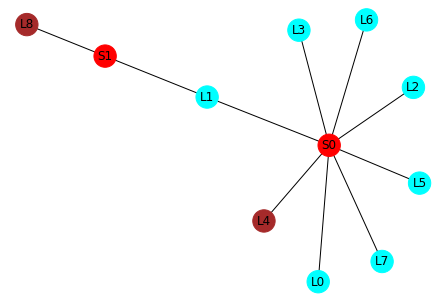

In [27]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [26]:
neuron_obj.same_soma_multi_touching_limbs

array([4, 8])

In [28]:
total_limbs_to_process = nru.error_limbs(neuron_obj)
total_limbs_to_process

array([1, 4, 8])

# Getting the Split Suggestions

In [142]:
neuron = reload(neuron)

In [144]:
neuron_obj = neuron.Neuron(neuron_obj)

Recieved another instance of Neuron class in init -- so just copying data


multi_soma_limbs = [1]
multi_touch_limbs = [4 8]


 -------- Working on limb 1------------
Starting combinations to process = [(10, 39)]


---- working on disconnecting 10 and 39
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Starting_edge inside branches_to_conept = [[1097960.  576547.  608714.]
 [1100130.  593355.  611840.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [10]
printing out current edge:
[[1100130.  593355.  611840.]
 [1097960.  576547.  608714.]]
edge_endpoints_to_process was empty so exiting loop after 42 iterations
starting_node in concept map (that should match the starting edge) = 10
Total time for branches to concept conversion = 0.5726439952850342

Shortest path = [10, 11, 23, 24, 31, 37, 39]

 --------- START OF GET BEST EDGE --------- 
Short segments to combine = []
Found 2 high degree coordinates to cut
Picking [1097960.  576547.  608714.] high degree coordinates to cut
coordinate_branches = [4, 6, 10

Angle between 4 and 6 = 88.88 
Angle between 4 and 10 = 103.43 
Angle between 4 and 11 = 63.57 
Angle between 6 and 10 = 28.0 
Angle between 6 and 11 = 127.56 
Angle between 10 and 11 = 69.24 
Final Matches = [[6, 10]]
matched_branches_revised = [[6, 10]]
Aligned Skeleton Parts


Original graph


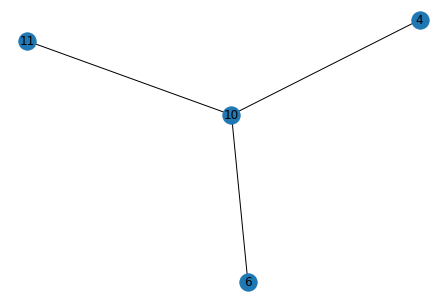

edges_to_delete = [array([ 4, 10]), array([10, 11])]
edges_to_create = []


Exception: 

In [155]:
import proofreading_utils as pru
limb_results = pru.multi_soma_split_suggestions(neuron_obj,
                                verbose=True,
                                plot_intermediates=True,
                                )

In [141]:
debug

> /meshAfterParty/skeleton_utils.py(5342)endpoint_connectivity()
   5340         print_string = f"Multiple endpoints matching: {endpoints_match}"
   5341         if exceptions_flag:
-> 5342             raise Exception(print_string)
   5343         else:
   5344             print(print_string)

ipdb> u
> /meshAfterParty/skeleton_utils.py(5378)shared_endpoint()
   5376     end_1 = find_branch_endpoints(skeleton_1)
   5377     end_2 = find_branch_endpoints(skeleton_2)
-> 5378     node_connectivity = endpoint_connectivity(end_1,end_2,print_flag=False,return_coordinate=True)
   5379     return node_connectivity
   5380 

ipdb> u
> /meshAfterParty/proofreading_utils.py(517)<listcomp>()
    515             suggested_cut_points = [sk.shared_endpoint(curr_limb_copy[cut_e[0]].skeleton,
    516                                                 curr_limb_copy[cut_e[1]].skeleton)
--> 517                                              for cut_e in total_soma_paths_to_cut]
    518 
    519             lo

In [146]:
debug

> /meshAfterParty/skeleton_utils.py(5342)endpoint_connectivity()
   5340         print_string = f"Multiple endpoints matching: {endpoints_match}"
   5341         if exceptions_flag:
-> 5342             raise Exception(print_string)
   5343         else:
   5344             print(print_string)

ipdb> u
> /meshAfterParty/skeleton_utils.py(5378)shared_endpoint()
   5376     end_1 = find_branch_endpoints(skeleton_1)
   5377     end_2 = find_branch_endpoints(skeleton_2)
-> 5378     node_connectivity = endpoint_connectivity(end_1,end_2,print_flag=False,return_coordinate=True)
   5379     return node_connectivity
   5380 

ipdb> u
> /meshAfterParty/proofreading_utils.py(525)<listcomp>()
    523             suggested_cut_points = [sk.shared_endpoint(curr_limb_copy[cut_e[0]].skeleton,
    524                                                 curr_limb_copy[cut_e[1]].skeleton)
--> 525                                              for cut_e in total_soma_paths_to_cut]
    526 
    527             lo

In [101]:
import system_utils as su

In [112]:
curr_limb = su.decompress_pickle("curr_limb")

In [115]:
curr_limb.concept_network_directional.edges()

OutEdgeView([(1, 2), (1, 0)])

In [123]:
sk.calculate_skeleton_distance(curr_limb[1].skeleton),sk.calculate_skeleton_distance(curr_limb[0].skeleton)

(1980.2430617399618, 1891.0745200668418)

In [121]:
up_sk

[]

In [ ]:
curr_limb[]

In [136]:
comparison_distance = 3000
offset = 1000
up_width,d_width,up_sk,d_sk = nru.branch_boundary_transition(curr_limb,
                              edge=[1,0],
                              comparison_distance = comparison_distance,
                            offset=offset,
                            verbose=True)

common_endpoint = [1128852.88825061  565209.63365708  595024.28706075]
Base needs flipping
Skeleton after flip = [[[1128852.88825061  565209.63365708  595024.28706075]
  [1128094.77993148  565660.65054224  595150.26065355]]

 [[1128094.77993148  565660.65054224  595150.26065355]
  [1127244.          566166.8         595291.63333333]]]
Base offset = 1000
Base: Passed the offset phase but was not long enough for comparison
Base: Not using offset 
--- Upstream iteration: 0 -----
upstream_skeleton_ordered 1402.2317315098717 = [[[1128583.96620801  566490.41095622  595210.83180443]
  [1128768.39626891  565593.02286676  594865.94165721]]

 [[1128768.39626891  565593.02286676  594865.94165721]
  [1128852.88825061  565209.63365708  595024.28706075]]]
flip_flag = True
upstream_offset = 1000
Restricting to offset
skeleton_minus_buffer 0 = []
After subtracting the offset the length is: 0
Subtracting the comparison was not successful so changing to 3000 and reiterating
New upstream_node = None
Brea

In [60]:
curr_limb.set_concept_network_directional?

In [51]:
curr_limb = su.decompress_pickle("curr_limb")
endpt = su.decompress_pickle("endpt")
divided_skeletons = su.decompress_pickle("divided_skeletons")
curr_limb_cp = su.decompress_pickle("curr_limb_cp")

In [49]:
[sk.find_skeleton_endpoint_coordinates(k) for k in divided_skeletons]

[array([[1127244.        ,  566166.8       ,  595291.63333333],
        [1128852.88825061,  565209.63365708,  595024.28706075]]),
 array([[1128583.96620801,  566490.41095622,  595210.83180443],
        [1128852.88825061,  565209.63365708,  595024.28706075]]),
 array([[1129066.16842105,  564937.47578947,  594995.56245614],
        [1129071.40292105,  564942.71028947,  595000.79695614]])]

In [45]:
import skeleton_utils as sk

In [46]:
[sk.find_skeleton_endpoint_coordinates(k) for k in skeletons]

[array([[1127244.        ,  566166.8       ,  595291.63333333],
        [1128852.88825061,  565209.63365708,  595024.28706075]]),
 array([[1128583.96620801,  566490.41095622,  595210.83180443],
        [1128852.88825061,  565209.63365708,  595024.28706075]]),
 array([[1128852.88825061,  565209.63365708,  595024.28706075],
        [1129176.6       ,  564805.96      ,  595736.94      ]])]

In [43]:
soma_endpoints

[array([1129176.6 ,  564805.96,  595736.94]),
 array([1128583.96620801,  566490.41095622,  595210.83180443]),
 TrackedArray([1127244.        ,  566166.8       ,  595291.63333333])]

In [52]:
soma_endpoints = [k["starting_coordinate"] for k in curr_limb_cp.all_concept_network_data]

In [53]:
meshes,skeletons = nviz.limb_correspondence_plottable(curr_limb_cp.limb_correspondence)
nviz.plot_objects(meshes=meshes,
                 meshes_colors="random",
                 skeletons=skeletons,
                 skeletons_colors="random",
                 scatters=soma_endpoints,
                 scatter_size=0.4)

In [ ]:
pru = reload(pru)
nviz = reload(nviz)
nviz.plot_split_suggestions_per_limb(neuron_obj,limb_results)

# Practice Cleaning the Skeleton

In [ ]:
ret_col = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)

In [ ]:
# getting the skeleton widths for all the branches
import matplotlib.pyplot as plt
sk_list = [sk.calculate_skeleton_distance(curr_branch.skeleton) for curr_branch in neuron_obj[0]]
plt.hist(sk_list)

In [ ]:
curr_limb = neuron_obj[0]

In [ ]:
curr_limb_sk_cleaned,removed_sk = sk.clean_skeleton(neuron_obj[0].skeleton,
                 distance_func=sk.skeletal_distance,
                 min_distance_to_junction=4001,
                 return_skeleton=True,
                 endpoints_must_keep=[k["starting_coordinate"] for k in curr_limb.all_concept_network_data],
                 print_flag=True,
                                        return_removed_skeletons=True)

In [ ]:
removed_sk

In [ ]:
nviz.plot_objects(curr_limb.mesh,
                 skeletons=[curr_limb_sk_cleaned] + removed_sk,
                 skeletons_colors=["black","red","red"],
                 #scatters=[k.reshape(-1,3) for k in removed_sk],
                 #scatter_size=0.5
                 )

# how to figure out which of the branches still remain?

In [ ]:
cleaned_branches = sk.decompose_skeleton_to_branches(curr_limb_sk_cleaned)
original_branches = [k.skeleton for k in curr_limb]
len(cleaned_branches),len(original_branches)

In [ ]:
from tqdm_utils import tqdm
from pykdtree.kdtree import KDTree

def map_between_branches_lists(branches_1,branches_2):
    """
    Purpose: 
    Will create a unique mapping of a branch
    in the first list to the best fitting branch in the second
    in terms of the most matching coordinates with a distance of 0
    
    Ex:
    cleaned_branches = sk.decompose_skeleton_to_branches(curr_limb_sk_cleaned)
    original_branches = [k.skeleton for k in curr_limb]
    map_between_branches_lists(original_branches,cleaned_branches)
    """
    old_to_new_branch_mapping = []

    for o_br in tqdm(original_branches):
        o_br_kd = KDTree(o_br.reshape(-1,3))

        n_matches = [len(np.where(o_br_kd.query(c_br.reshape(-1,3))[0]==0)[0]) for c_br in cleaned_branches]
        old_to_new_branch_mapping.append(np.argmax(n_matches))
        
    return np.array(old_to_new_branch_mapping)

sk.map_between_branches_lists(original_branches,cleaned_branches)
    

In [ ]:
poisson_mesh = tu.poisson_surface_reconstruction(curr_branch.mesh)
nviz.plot_objects(tu.split_significant_pieces(poisson_mesh)[0])

In [ ]:
curr_branch = neuron_obj[0][5]
curr_branch.width_new

In [ ]:
nviz.plot_limb_concept_network_2D(neuron_obj,
                                 node_colors=ret_col)

# Split the Neuron

In [ ]:
limb_results = pru.multi_soma_split_suggestions(neuron_obj,
                                plot_suggestions=True)

In [ ]:
limb_results

In [ ]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True)

In [ ]:
limb_results

In [ ]:
nviz.plot_split_suggestions_per_limb(neuron_obj,
                                    limb_results=limb_results,
                                    scatter_size=0.7)

In [ ]:
neuron_list = pru.split_neuron(neuron_obj,
                plot_soma_limb_network=True,
                 plot_seperated_neurons=True)

In [ ]:
nviz.plot_soma_limb_concept_network(neuron_obj)